<a id = "1.0"></a>
<p style="font-size:25px;color:black;font-family:'Arial';text-align:left;border-radius:5px 5px 5px 5px;">
<strong>AutoML - FLAML</strong></p> 

In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import numpy as np

np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.21.5


In [3]:
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib version: 3.6.0


In [4]:
import warnings
warnings.filterwarnings("ignore",message=".*numpy.*")

In [5]:
train_set = pd.read_csv('2_fe_data/train_set_fe.csv')

In [6]:
test_set = pd.read_csv('2_fe_data/test_set_fe.csv')

In [7]:
train_set.head()

,is_fraud,transaction_amt,product_cd,card1,card2,card3,card4,card5,card6,addr1,addr2,p_emaildomain,r_emaildomain,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d8,d9,d10,d12,d13,d14,d15,m4,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,device_type,device_info,Hora,diaSemana,pixelCount,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19
0,0,68.5,0.020,13926,-1.0,150.0,0.077,142.0,0.067,315.0,87.0,-1.000,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0,-1.0,-1.0,-1.0,0.0,0.114,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6602.023,-772.102,30.573,-14.024,-129.583,-25.620,-48.798,-74.692,56.160,120.992,45.940,1.509,-88.539,9.456,74.749,-17.590,82.193,0.204,-11.245,6.793
1,0,29.0,0.020,2755,404.0,150.0,0.034,102.0,0.067,325.0,87.0,0.044,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6601.840,-900.309,-45.776,-113.185,-126.300,-13.893,-109.024,-72.415,137.387,76.664,35.079,44.747,-47.047,-22.684,37.561,6.909,51.998,13.798,-12.369,13.181
2,0,59.0,0.020,4663,490.0,150.0,0.035,166.0,0.024,330.0,87.0,0.095,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,315.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6601.840,-900.309,-45.776,-113.185,-126.300,-13.893,-109.024,-72.415,137.386,76.663,35.079,44.746,-47.046,-22.684,37.561,6.910,51.997,13.797,-12.369,13.181
3,0,50.0,0.020,18132,567.0,150.0,0.034,117.0,0.024,476.0,87.0,0.023,-1.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,-1.0,-1.0,-1.0,84.0,-1.0,-1.0,-1.0,111.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,0,1,-1.000e+00,-6605.333,1551.597,1341.548,1461.907,177.574,-141.031,284.937,79.265,-1043.247,-360.917,-47.767,-107.047,-368.710,569.129,599.248,-123.424,-49.072,97.753,-200.858,-97.460
4,0,50.0,0.048,4497,514.0,150.0,0.034,102.0,0.067,420.0,87.0,0.044,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.0,70787.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,100.0,0.082,-1.0,-480.0,0.049,0.048,166.0,542.0,144.0,0.052,0.051,0.058,0.071,32.0,0.039,0.045,0.082,0.083,0.06,0.102,0.0,0,1,2.398e+06,163765.389,-665.245,9.441,-161.765,305.487,6808.540,993.627,340.522,54.097,192.289,-4.999,-15.487,-227.064,-11.594,277.127,136.411,-96.232,23.447,269.094,-358.683


In [8]:
test_set.head()

,transaction_amt,product_cd,card1,card2,card3,card4,card5,card6,addr1,addr2,p_emaildomain,r_emaildomain,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d12,d13,d14,d15,m4,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,device_type,device_info,Hora,diaSemana,pixelCount,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19
0,31.95,0.02,10409,111.0,150.0,0.035,226.0,0.024,170.0,87.0,0.044,-1.0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,-1.0,-1.0,-1.0,-1.0,418.0,-1.0,-1.0,-1.0,409.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.836,-400.386,-15.201,74.990,-178.987,-166.919,-23.790,-54.245,9.251,29.643,-80.520,15.939,-15.281,-27.509,-1.325,-12.851,33.182,58.192,16.029,-24.300
1,49.00,0.02,4272,111.0,150.0,0.035,226.0,0.024,299.0,87.0,0.022,-1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,-1.0,-1.0,-1.0,-1.0,231.0,-1.0,-1.0,-1.0,634.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.862,-307.900,-14.370,115.217,-11.648,27.048,47.100,-1.998,-60.303,7.081,66.285,8.059,100.573,53.951,-12.655,74.409,-109.253,-130.812,5.222,74.615
2,171.00,0.02,4476,574.0,150.0,0.035,226.0,0.024,472.0,87.0,0.053,-1.0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,-1.0,-1.0,-1.0,-1.0,136.0,-1.0,-1.0,-1.0,97.0,0.037,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.964,-51.627,54.285,223.258,624.818,555.087,259.690,188.959,-257.370,240.304,448.106,46.932,254.094,381.819,-13.355,270.050,-518.982,-552.697,132.908,293.340
3,284.95,0.02,10989,360.0,150.0,0.035,166.0,0.024,205.0,87.0,0.044,-1.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,-1.0,-1.0,-1.0,-1.0,242.0,-1.0,-1.0,-1.0,242.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.846,-414.861,-15.322,68.409,-208.623,-195.681,-40.927,-61.675,19.561,24.142,-99.578,21.342,-30.974,-40.183,1.287,-21.922,49.805,70.112,2.724,-17.585
4,67.95,0.02,18018,452.0,150.0,0.034,117.0,0.024,264.0,87.0,0.044,-1.0,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,-1.0,-1.0,-1.0,-1.0,22.0,-1.0,-1.0,-1.0,22.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,3,-1.0,-14773.843,-321.961,-22.745,106.031,-74.757,-4.155,-3.723,-1.367,-34.781,-36.624,9.753,-6.047,89.780,8.559,-6.899,47.981,-42.316,-14.998,10.099,31.753


In [11]:
print(train_set.shape)
print(test_set.shape)

(590540, 93)
(506691, 94)


<a id = "1.0"></a>
<p style="font-size:18px;color:black;font-family:'Arial';text-align:left;border-radius:5px 5px 5px 5px;">
<strong>FLAML AutoML</strong></p> 

In [12]:
from flaml import AutoML

In [13]:
automl = AutoML()

In [14]:
automl_settings = {
    "time_budget": 600,        # seconds
    "metric": 'roc_auc',
    "task": 'classification'
}

In [15]:
X = train_set.drop('is_fraud', axis=1)
y = train_set['is_fraud']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
automl.fit(X_train=X_train, y_train=y_train,**automl_settings)

[flaml.automl.automl: 07-30 18:01:22] {2726} INFO - task = classification
[flaml.automl.automl: 07-30 18:01:22] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 07-30 18:01:22] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 07-30 18:01:23] {2858} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.automl: 07-30 18:01:23] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 07-30 18:01:23] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 07-30 18:01:23] {3472} INFO - Estimated sufficient time budget=37841s. Estimated necessary time budget=872s.
[flaml.automl.automl: 07-30 18:01:23] {3519} INFO -  at 13.1s,	estimator lgbm's best error=0.1992,	best estimator lgbm's best error=0.1992
[flaml.automl.automl: 07-30 18:01:23] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 07-30 18:01:23] {3519} INFO -  at 13.2s,	estimator lgbm's bes

C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:01:23] {3519} INFO -  at 13.4s,	estimator lgbm's best error=0.1854,	best estimator lgbm's best error=0.1854
[flaml.automl.automl: 07-30 18:01:23] {3334} INFO - iteration 5, current learner lgbm
[flaml.automl.automl: 07-30 18:01:23] {3519} INFO -  at 13.5s,	estimator lgbm's best error=0.1854,	best estimator lgbm's best error=0.1854
[flaml.automl.automl: 07-30 18:01:23] {3334} INFO - iteration 6, current learner lgbm
[flaml.automl.automl: 07-30 18:01:23] {3519} INFO -  at 13.6s,	estimator lgbm's best error=0.1723,	best estimator lgbm's best error=0.1723
[flaml.automl.automl: 07-30 18:01:23] {3334} INFO - iteration 7, current learner lgbm
[flaml.automl.automl: 07-30 18:01:23] {3519} INFO -  at 13.7s,	estimator lgbm's best error=0.1723,	best estimator lgbm's best error=0.1723
[flaml.automl.automl: 07-30 18:01:23] {3334} INFO - iteration 8, current learner lgbm
[flaml.automl.automl: 07-30 18:01:23] {3519} INFO -  at 13.8s,	estimator lgbm's best error=0.1723,	b

C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:01:24] {3334} INFO - iteration 12, current learner extra_tree
[flaml.automl.automl: 07-30 18:01:24] {3519} INFO -  at 14.0s,	estimator extra_tree's best error=0.2500,	best estimator lgbm's best error=0.1723
[flaml.automl.automl: 07-30 18:01:24] {3334} INFO - iteration 13, current learner rf
[flaml.automl.automl: 07-30 18:01:24] {3519} INFO -  at 14.1s,	estimator rf's best error=0.2117,	best estimator lgbm's best error=0.1723
[flaml.automl.automl: 07-30 18:01:24] {3334} INFO - iteration 14, current learner rf
[flaml.automl.automl: 07-30 18:01:24] {3519} INFO -  at 14.1s,	estimator rf's best error=0.2049,	best estimator lgbm's best error=0.1723
[flaml.automl.automl: 07-30 18:01:24] {3334} INFO - iteration 15, current learner extra_tree
[flaml.automl.automl: 07-30 18:01:24] {3519} INFO -  at 14.2s,	estimator extra_tree's best error=0.2262,	best estimator lgbm's best error=0.1723
[flaml.automl.automl: 07-30 18:01:24] {3334} INFO - iteration 16, current learne

C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:01:38] {3519} INFO -  at 28.3s,	estimator rf's best error=0.1403,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:38] {3334} INFO - iteration 46, current learner lgbm
[flaml.automl.automl: 07-30 18:01:41] {3519} INFO -  at 31.7s,	estimator lgbm's best error=0.0896,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:41] {3334} INFO - iteration 47, current learner rf
[flaml.automl.automl: 07-30 18:01:42] {3519} INFO -  at 31.9s,	estimator rf's best error=0.1403,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:42] {3334} INFO - iteration 48, current learner lgbm
[flaml.automl.automl: 07-30 18:01:46] {3519} INFO -  at 36.0s,	estimator lgbm's best error=0.0896,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:46] {3334} INFO - iteration 49, current learner rf
[flaml.automl.automl: 07-30 18:01:46] {3519} INFO -  at 36.3s,	estimator rf's best error=0.1403,	best es

C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:01:46] {3519} INFO -  at 36.6s,	estimator xgb_limitdepth's best error=0.1555,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:46] {3334} INFO - iteration 52, current learner xgb_limitdepth
[flaml.automl.automl: 07-30 18:01:46] {3519} INFO -  at 36.7s,	estimator xgb_limitdepth's best error=0.1555,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:46] {3334} INFO - iteration 53, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:01:46] {3519} INFO -  at 36.8s,	estimator xgb_limitdepth's best error=0.1555,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:46] {3334} INFO - iteration 54, current learner xgb_limitdepth
[flaml.automl.automl: 07-30 18:01:47] {3519} INFO -  at 37.0s,	estimator xgb_limitdepth's best error=0.1555,	best estimator lgbm's best error=0.0896
[flaml.automl.automl: 07-30 18:01:47] {3334} INFO - iteration 55, current learner lgbm


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:01:51] {3519} INFO -  at 41.2s,	estimator lgbm's best error=0.0622,	best estimator lgbm's best error=0.0622
[flaml.automl.automl: 07-30 18:01:51] {3334} INFO - iteration 56, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:01:51] {3519} INFO -  at 41.6s,	estimator xgb_limitdepth's best error=0.1346,	best estimator lgbm's best error=0.0622
[flaml.automl.automl: 07-30 18:01:51] {3334} INFO - iteration 57, current learner lgbm
[flaml.automl.automl: 07-30 18:01:56] {3519} INFO -  at 46.2s,	estimator lgbm's best error=0.0513,	best estimator lgbm's best error=0.0513
[flaml.automl.automl: 07-30 18:01:56] {3334} INFO - iteration 58, current learner lgbm
[flaml.automl.automl: 07-30 18:02:00] {3519} INFO -  at 50.5s,	estimator lgbm's best error=0.0513,	best estimator lgbm's best error=0.0513
[flaml.automl.automl: 07-30 18:02:00] {3334} INFO - iteration 59, current learner lgbm
[flaml.automl.automl: 07-30 18:02:12] {3519} INFO -  at 62.0s,	estimator lgbm's best error=0.0408,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:02:12] {3334} INFO - iteration 60, current learner lgbm
[flaml.automl.automl: 07-30 18:02:17] {3519} INFO -  at 67.2s,	estimator lgbm's best e

C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:02:17] {3519} INFO -  at 67.4s,	estimator xgb_limitdepth's best error=0.1346,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:02:17] {3334} INFO - iteration 62, current learner lgbm
[flaml.automl.automl: 07-30 18:02:22] {3519} INFO -  at 72.5s,	estimator lgbm's best error=0.0408,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:02:22] {3334} INFO - iteration 63, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:02:23] {3519} INFO -  at 73.4s,	estimator xgb_limitdepth's best error=0.1230,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:02:23] {3334} INFO - iteration 64, current learner lrl1
[flaml.automl.automl: 07-30 18:02:24] {3519} INFO -  at 74.4s,	estimator lrl1's best error=0.6418,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:02:24] {3334} INFO - iteration 65, current learner lrl1


C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 07-30 18:02:25] {3519} INFO -  at 75.4s,	estimator lrl1's best error=0.6418,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:02:25] {3334} INFO - iteration 66, current learner lgbm


C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 07-30 18:03:08] {3519} INFO -  at 118.5s,	estimator lgbm's best error=0.0408,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:08] {3334} INFO - iteration 67, current learner rf
[flaml.automl.automl: 07-30 18:03:09] {3519} INFO -  at 118.9s,	estimator rf's best error=0.1403,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:09] {3334} INFO - iteration 68, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:10] {3519} INFO -  at 120.0s,	estimator xgb_limitdepth's best error=0.1230,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:10] {3334} INFO - iteration 69, current learner rf
[flaml.automl.automl: 07-30 18:03:10] {3519} INFO -  at 120.1s,	estimator rf's best error=0.1403,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:10] {3334} INFO - iteration 70, current learner lgbm
[flaml.automl.automl: 07-30 18:03:18] {3519} INFO -  at 128.3s,	estimator lgbm's best error=0.0408,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:18] {3334} INFO - iteration 71, current learner rf
[flaml.automl.automl: 07-30 18:03:18] {3519} INFO -  at 128.5s,	estimator rf's best error=0.1403,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:18] {3334} INFO - iteration 72, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:19] {3519} INFO -  at 129.1s,	estimator xgb_limitdepth's best error=0.1230,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:19] {3334} INFO - iteration 73, current learner rf
[flaml.automl.automl: 07-30 18:03:19] {3519} INFO -  at 129.4s,	estimator rf's best error=0.1403,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:19] {3334} INFO - iteration 74, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:20] {3519} INFO -  at 130.4s,	estimator xgb_limitdepth's best error=0.1230,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:20] {3334} INFO - iteration 75, current learner xgboost
[flaml.automl.automl: 07-30 18:03:20] {3519} INFO -  at 130.5s,	estimator xgboost's best error=0.2615,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:20] {3334} INFO - iteration 76, current learner xgboost
[flaml.automl.automl: 07-30 18:03:20] {3519} INFO -  at 130.5s,	estimator xgboost's best error=0.2417,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:20] {3334} INFO - iteration 77, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:20] {3519} INFO -  at 130.6s,	estimator xgboost's best error=0.2417,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:20] {3334} INFO - iteration 78, current learner xgboost
[flaml.automl.automl: 07-30 18:03:20] {3519} INFO -  at 130.7s,	estimator xgboost's best error=0.1723,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:20] {3334} INFO - iteration 79, current learner xgboost
[flaml.automl.automl: 07-30 18:03:20] {3519} INFO -  at 130.8s,	estimator xgboost's best error=0.1497,	best estimator lgbm's best error=0.0408


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:20] {3334} INFO - iteration 80, current learner xgboost
[flaml.automl.automl: 07-30 18:03:21] {3519} INFO -  at 130.9s,	estimator xgboost's best error=0.1497,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:21] {3334} INFO - iteration 81, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:21] {3519} INFO -  at 131.0s,	estimator xgboost's best error=0.1474,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:21] {3334} INFO - iteration 82, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:21] {3519} INFO -  at 131.7s,	estimator xgb_limitdepth's best error=0.1187,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:21] {3334} INFO - iteration 83, current learner rf
[flaml.automl.automl: 07-30 18:03:25] {3519} INFO -  at 135.5s,	estimator rf's best error=0.1310,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:25] {3334} INFO - iteration 84, current learner xgboost
[flaml.automl.automl: 07-30 18:03:25] {3519} INFO -  at 135.6s,	estimator xgboost's best error=0.1397,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:25] {3334} INFO - iteration 85, current learner xgboost
[flaml.automl.automl: 07-30 18:03:25] {3519} INFO -  at 135.6s,	estimator xgboost's best error=0.1397,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:25] {3334} INFO - iteration 86, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:25] {3519} INFO -  at 135.8s,	estimator xgboost's best error=0.1378,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:25] {3334} INFO - iteration 87, current learner xgboost
[flaml.automl.automl: 07-30 18:03:25] {3519} INFO -  at 135.9s,	estimator xgboost's best error=0.1378,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:25] {3334} INFO - iteration 88, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:26] {3519} INFO -  at 136.1s,	estimator xgboost's best error=0.1378,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:26] {3334} INFO - iteration 89, current learner rf
[flaml.automl.automl: 07-30 18:03:31] {3519} INFO -  at 141.6s,	estimator rf's best error=0.1225,	best estimator lgbm's best error=0.0408
[flaml.automl.automl: 07-30 18:03:31] {3334} INFO - iteration 90, current learner lgbm
[flaml.automl.automl: 07-30 18:03:48] {3519} INFO -  at 158.8s,	estimator lgbm's best error=0.0379,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:03:48] {3334} INFO - iteration 91, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:49] {3519} INFO -  at 159.1s,	estimator xgb_limitdepth's best error=0.1187,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:03:49] {3334} INFO - iteration 92, current learner xgboost
[flaml.automl.automl: 07-30 18:03:49] {3519} INFO -  at 159.2s,	estimator xgboost's best error=0.1378,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:03:49] {3334} INFO - iteration 93, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:50] {3519} INFO -  at 160.4s,	estimator xgb_limitdepth's best error=0.1088,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:03:50] {3334} INFO - iteration 94, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:51] {3519} INFO -  at 160.9s,	estimator xgb_limitdepth's best error=0.1088,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:03:51] {3334} INFO - iteration 95, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:03:53] {3519} INFO -  at 163.3s,	estimator xgb_limitdepth's best error=0.1079,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:03:53] {3334} INFO - iteration 96, current learner lgbm
[flaml.automl.automl: 07-30 18:04:13] {3519} INFO -  at 183.5s,	estimator lgbm's best error=0.0379,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:13] {3334} INFO - iteration 97, current learner extra_tree
[flaml.automl.automl: 07-30 18:04:13] {3519} INFO -  at 183.5s,	estimator extra_tree's best error=0.2261,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:13] {3334} INFO - iteration 98, current learner rf
[flaml.automl.automl: 07-30 18:04:16] {3519} INFO -  at 186.6s,	estimator rf's best error=0.1225,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:16] {3334} INFO - iteration 99, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:04:16] {3519} INFO -  at 186.8s,	estimator xgboost's best error=0.1378,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:16] {3334} INFO - iteration 100, current learner rf
[flaml.automl.automl: 07-30 18:04:22] {3519} INFO -  at 191.9s,	estimator rf's best error=0.1225,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:22] {3334} INFO - iteration 101, current learner lgbm
[flaml.automl.automl: 07-30 18:04:40] {3519} INFO -  at 210.3s,	estimator lgbm's best error=0.0379,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:40] {3334} INFO - iteration 102, current learner extra_tree
[flaml.automl.automl: 07-30 18:04:40] {3519} INFO -  at 210.3s,	estimator extra_tree's best error=0.2261,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:40] {3334} INFO - iteration 103, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:04:40] {3519} INFO -  at 210.6s,	estimator xgboost's best error=0.1191,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:04:40] {3334} INFO - iteration 104, current learner lgbm
[flaml.automl.automl: 07-30 18:07:05] {3519} INFO -  at 355.2s,	estimator lgbm's best error=0.0379,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:05] {3334} INFO - iteration 105, current learner xgboost
[flaml.automl.automl: 07-30 18:07:05] {3519} INFO -  at 355.4s,	estimator xgboost's best error=0.1191,	best estimator lgbm's best error=0.0379


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:05] {3334} INFO - iteration 106, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:06] {3519} INFO -  at 355.9s,	estimator xgboost's best error=0.1118,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:06] {3334} INFO - iteration 107, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:06] {3519} INFO -  at 356.2s,	estimator xgboost's best error=0.1118,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:06] {3334} INFO - iteration 108, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:08] {3519} INFO -  at 358.3s,	estimator xgboost's best error=0.1060,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:08] {3334} INFO - iteration 109, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:10] {3519} INFO -  at 360.2s,	estimator xgboost's best error=0.1060,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:10] {3334} INFO - iteration 110, current learner extra_tree
[flaml.automl.automl: 07-30 18:07:10] {3519} INFO -  at 360.3s,	estimator extra_tree's best error=0.2261,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:10] {3334} INFO - iteration 111, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:11] {3519} INFO -  at 361.9s,	estimator xgboost's best error=0.1060,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:11] {3334} INFO - iteration 112, current learner lgbm
[flaml.automl.automl: 07-30 18:07:16] {3519} INFO -  at 366.4s,	estimator lgbm's best error=0.0379,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:16] {3334} INFO - iteration 113, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:18] {3519} INFO -  at 367.9s,	estimator xgb_limitdepth's best error=0.1079,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:18] {3334} INFO - iteration 114, current learner xgboost


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:18] {3519} INFO -  at 368.7s,	estimator xgboost's best error=0.1060,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:18] {3334} INFO - iteration 115, current learner xgb_limitdepth


C:\Users\Lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 07-30 18:07:24] {3519} INFO -  at 374.1s,	estimator xgb_limitdepth's best error=0.1074,	best estimator lgbm's best error=0.0379
[flaml.automl.automl: 07-30 18:07:24] {3334} INFO - iteration 116, current learner lgbm
[flaml.automl.automl: 07-30 18:08:08] {3519} INFO -  at 418.0s,	estimator lgbm's best error=0.0365,	best estimator lgbm's best error=0.0365
[flaml.automl.automl: 07-30 18:08:08] {3334} INFO - iteration 117, current learner lgbm
[flaml.automl.automl: 07-30 18:08:31] {3519} INFO -  at 441.2s,	estimator lgbm's best error=0.0365,	best estimator lgbm's best error=0.0365
[flaml.automl.automl: 07-30 18:08:31] {3334} INFO - iteration 118, current learner extra_tree
[flaml.automl.automl: 07-30 18:08:31] {3519} INFO -  at 441.3s,	estimator extra_tree's best error=0.2199,	best estimator lgbm's best error=0.0365
[flaml.automl.automl: 07-30 18:08:31] {3334} INFO - iteration 119, current learner extra_tree
[flaml.automl.automl: 07-30 18:08:31] {3519} INFO -  at 441.

In [19]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 1590, 'num_leaves': 272, 'min_child_samples': 7, 'learning_rate': 0.031214842737637295, 'log_max_bin': 4, 'colsample_bytree': 0.3107398516622787, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.26949422933113165}
Best accuracy on validation data: 0.9635
Training duration of best run: 53.02 s


In [20]:
print(automl.model)

In [22]:
test_labels = pd.read_csv('0_data/test_transaction.csv')

In [23]:
test_labels.shape

(506691, 393)

In [24]:
test_labels = test_labels['TransactionID']

In [25]:
test_labels.shape

(506691,)

In [26]:
predicciones = automl.predict_proba(test_set)

In [27]:
resultados = pd.DataFrame()

In [28]:
resultados['TransactionID'] = test_labels

In [29]:
resultados['isFraud'] = pd.Series(predicciones[:,1])

In [30]:
resultados.to_csv('predicciones_flaml.csv', index=False) 

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_val, automl.predict(X_val))

In [33]:
ncm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

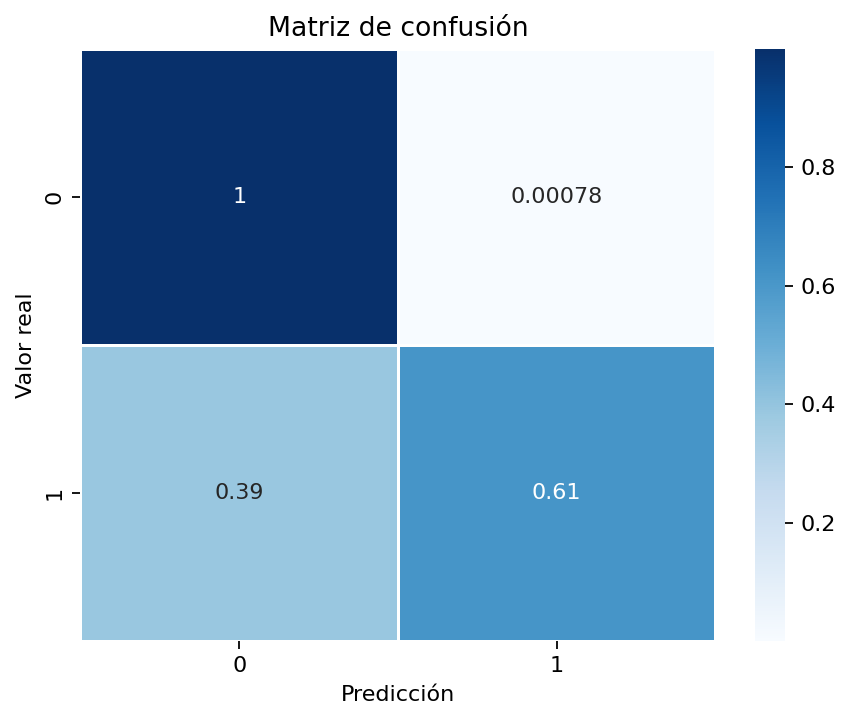

In [35]:
plt.figure(dpi = 160)
ax = sns.heatmap(ncm,linewidths=.5,annot = True,cmap = 'Blues')

ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
ax.set_title('Matriz de confusión')

plt.xticks(rotation=0)

<a id = "1.0"></a>
<p style="font-size:18px;color:black;font-family:'Arial';text-align:left;border-radius:5px 5px 5px 5px;">
<strong>Guardar Modelo</strong></p> 

In [39]:
import pickle

In [40]:
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [41]:
automl = pickle.load(open('automl.pkl', 'rb'))